In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as sklm
import pandas as pd
import geopandas as gpd
import csv
from sklearn import metrics

In [21]:
data_filename = 'Shanghai/result/LP.csv'
LP = np.genfromtxt(data_filename,delimiter = ',')
data_filename = 'Shanghai/result/LH.csv'
LH = np.genfromtxt(data_filename,delimiter = ',')
data_filename = 'Shanghai/result/LS.csv'
LS = np.genfromtxt(data_filename,delimiter = ',')

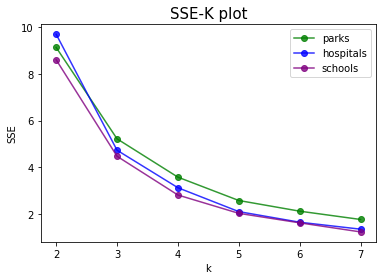

In [22]:
SSE1 = []
SSE2 = []
SSE3 = []
for k in range(2, 8):
    model1 = KMeans(n_clusters=k).fit(LP)
    SSE1.append(model1.inertia_)
    model2 = KMeans(n_clusters=k).fit(LH)
    SSE2.append(model2.inertia_)
    model3 = KMeans(n_clusters=k).fit(LS)
    SSE3.append(model3.inertia_)
X = range(2, 8)

fig_title = 'SSE-K plot'
plt.title(fig_title,fontsize=15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE1, 'o-',color="Green",alpha=0.8,label="parks")
plt.plot(X, SSE2, 'o-',color="Blue",alpha=0.8,label="hospitals")
plt.plot(X, SSE3, 'o-',color="Purple",alpha=0.8,label="schools")
plt.legend()

In [23]:
num_clusters=4
kmeans_output = KMeans(n_clusters=num_clusters, n_init=1).fit(LP)
clustering_ids_kmeans = kmeans_output.labels_
complete_data_with_clusters = np.hstack((LP,np.array([clustering_ids_kmeans]).T))
datasave = pd.DataFrame(complete_data_with_clusters)
datasave.to_csv('Shanghai/result/LP_result.csv')

In [24]:
num_clusters=4
kmeans_output = KMeans(n_clusters=num_clusters, n_init=1).fit(LH)
clustering_ids_kmeans = kmeans_output.labels_
complete_data_with_clusters = np.hstack((LH,np.array([clustering_ids_kmeans]).T))
datasave = pd.DataFrame(complete_data_with_clusters)
datasave.to_csv('Shanghai/result/LH_result.csv')

In [25]:
num_clusters=4
kmeans_output = KMeans(n_clusters=num_clusters, n_init=1).fit(LS)
clustering_ids_kmeans = kmeans_output.labels_
complete_data_with_clusters = np.hstack((LS,np.array([clustering_ids_kmeans]).T))
datasave = pd.DataFrame(complete_data_with_clusters)
datasave.to_csv('Shanghai/result/LS_result.csv')

Text(0.5, 1.0, 'Shanghai green space accessibility satisfaction')

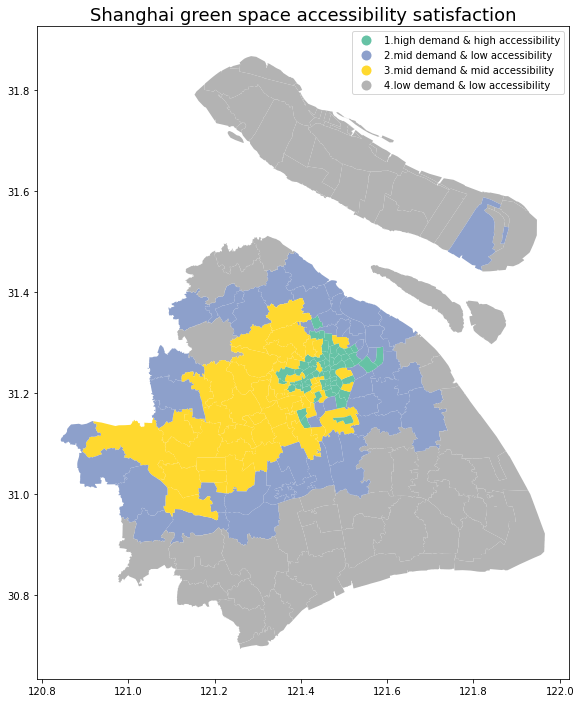

In [11]:
datafin = pd.read_csv('Shanghai/result/LP_result.csv')
gdf = gpd.read_file("shanghai1.shp").to_crs("EPSG:4236")
plotkmeans = pd.merge(gdf, datafin ,left_on='NAME', right_on='NAME', how='inner').reset_index()
plotkmeans.plot(column='group', cmap="Set2",categorical=True, legend=True, figsize=(30,12))
plt.title("Shanghai green space accessibility satisfaction",fontsize=18)

Text(0.5, 1.0, 'Shanghai health care accessibility satisfaction')

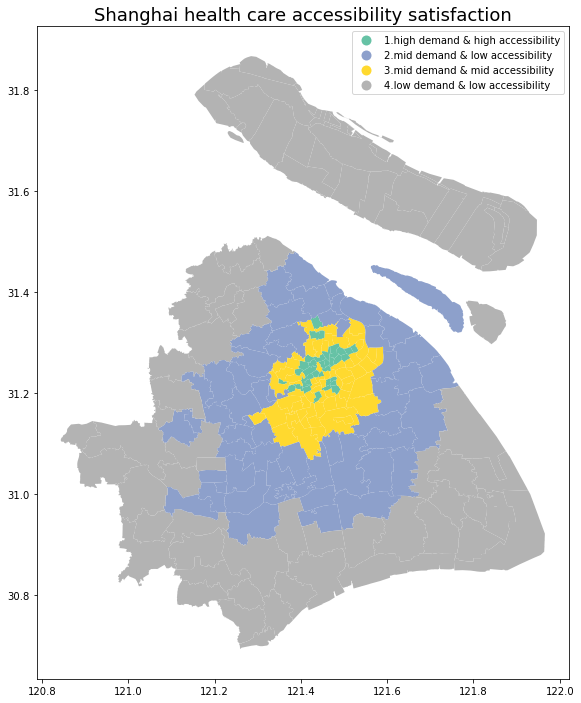

In [12]:
datafin = pd.read_csv('Shanghai/result/LH_result.csv')
gdf = gpd.read_file("shanghai1.shp").to_crs("EPSG:4236")
plotkmeans = pd.merge(gdf, datafin ,left_on='NAME', right_on='NAME', how='inner').reset_index()
plotkmeans.plot(column='group', cmap="Set2",categorical=True, legend=True, figsize=(30,12))
plt.title("Shanghai health care accessibility satisfaction",fontsize=18)

Text(0.5, 1.0, 'Shanghai education resources accessibility satisfaction')

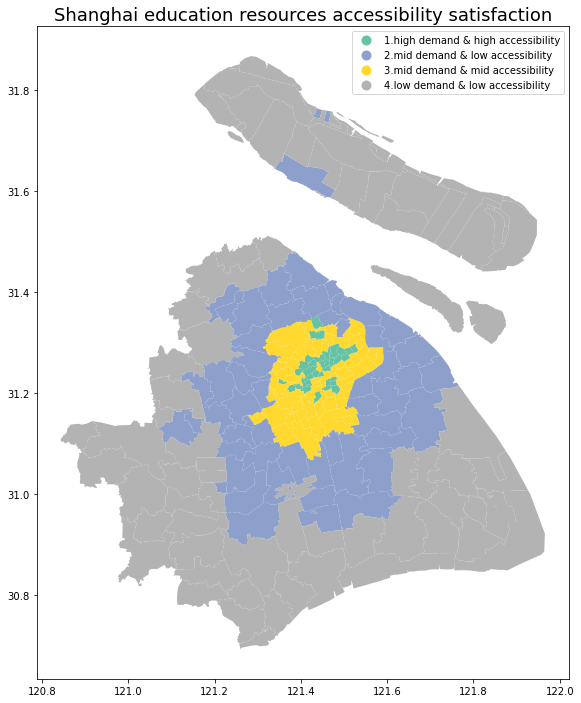

In [13]:
datafin = pd.read_csv('Shanghai/result/LS_result.csv')
gdf = gpd.read_file("shanghai1.shp").to_crs("EPSG:4236")
plotkmeans = pd.merge(gdf, datafin ,left_on='NAME', right_on='NAME', how='inner').reset_index()
plotkmeans.plot(column='group', cmap="Set2",categorical=True, legend=True,figsize=(30,12))
plt.title("Shanghai education resources accessibility satisfaction",fontsize=18)